# COGS 118A- Project Proposal

# Team

- Xiaoxuan Zhang
- Yunxiang Chi
- Xiaoyan He
- Jiayi Dong
- Elaine (Yilin) Ge

# Abstract 

The project is designed to be a Music Genre Classification Tool.

Our study aims to develop an advanced music genre classification system with the objective of enhancing personalized recommendation mechanisms and user experience. The comprehensive classification model is capable of accommodating a wide spectrum of music genres, such as rock, pop, jazz, hip-hop, and electronic, among others. The dataset comprises audio recordings of songs, evaluated through an array of attributes such as spectral information, rhythmic patterns, and harmonic characteristics, along with mean and variance of multiple features in CSV files. These extracted features serve as input for our machine learning models. Employing algorithms like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks, the research exploits a heterogeneous dataset of labeled music samples spanning various genres. The efficacy of the proposed music genre classification system is gauged through numerous evaluation metrics, including accuracy, precision, recall, F1 score, and confusion matrix. These quantitative assessments shed light on the models' classification performance and their capability to accurately predict music genres, enabling the selection of the most efficient model. By demonstrating high accuracy and robustness, our tool exhibits its effectiveness and dependability, promising significant improvements in music recommendation systems.

# Background

Music genres are categories that have arisen through a complex interplay of cultures, artists, and market forces to characterize differences between compositions and performances. They can reflect the cultural origins of the music, the style, the instrumentation used, the mood it conveys, or even the time period when it was produced. For example, the genre of classical music, the more ancient style, is known for its sophisticated orchestral composition and large musical scales. On the other hand, genres like rock and pop, which emerged more recently, have their distinct characteristics: rock typically features a strong backbeat along with electric guitars, while pop music often has catchy and repetitive melodies and a verse-chorus structure.

Our project is focused on developing a state-of-the-art music genre classification system that optimizes the way music platforms and music companies design their personalized recommendation systems to improve overall music listening experience and user experience through a more precise way of avigating and discovering music. 

To achieve this, we employ advanced machine learning algorithms and data analysis techniques, leveraging a diverse dataset of labeled music samples spanning different genres with various features. We will also compare among different algoritms' performances to ensure the system's accuracy, robustness, and ability to generalize across a wide range of music styles.

# Problem Statement
The problem our project seeks to address is the accurate categorization of music tracks into their respective genres. Precise music genre classification is a complex and multifaceted challenge due to the inherent subjectivity involved in music perception and the overlapping elements present across various genres. Yet, accurate genre classification is paramount to improving user experience on music platforms, as it plays a crucial role in personalized music recommendation systems.

Our project tackles this problem through the lens of supervised machine learning. With a dataset of songs with labeled genres and an array of song features, we aim to train a model that can accurately predict the genre of a song, even with unseen data. Our goal is to devise a machine learning model that optimizes precision and generalization while minimizing overfitting.

# Data

The dataset we are using is GTZAN Dataset - Music Genre Classification <a name="gtzan"></a>[<sup>[1]</sup>](#gtzannote)

- https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
- Content:
    - original soundfile: Collection of 10 genres with 100 30-seconds audio files each.
    - images: Power Spectra of each audio files in image formats. 
    - 2 csv: Containing multiple features of all the songs.

For our model, we design to use both csv files, which have the following 10 variables (with both mean and variance) as well as 1000 observations:
- pitch (chroma in the dataset)
- RMS in audio signals
- spectral centroid
- spectral bandwidth
- roll-off frequency
- zero crossing rate
- harmony
- perceptron
- tempo
- 20 groups of Mel Frequency Cepstral Coefficients


special handling, transformations, cleaning will be decided and listed here later.
 
 

(We're aiming to find an extra dataset that can be combined with GTZAN Dataset)

# Library setups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [24]:
df_raw = pd.read_csv("Data/features_30_sec.csv")
df_raw

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [25]:
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

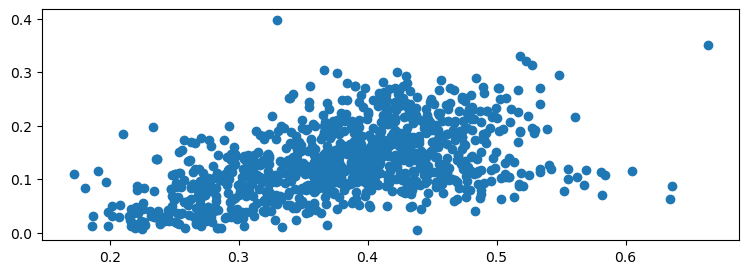

In [35]:
plt.figure(figsize=(9,3))
plt.scatter(df_raw['chroma_stft_mean'], df_raw['rms_mean'])
plt.show()
# group by genres, and put data points onto the canvas

# Proposed Solution
In general, the solution will be the following in steps:
1. Data Processing: We will begin by pre-processing our dataset. This involves handling missing data, dealing with outliers, and possibly transforming variables as necessary to make them appropraite to use.
2. Feature Selection: We will choose chroma_stft, rms, spectral_centroid, spectral_bandwidth, roll_off, zero_crossing_rate, harmony, perceptr, tempo, mfcc(1-20) to determine the genre of songs. Since we can't get those data in every frame or seconds, so we just get their mean and variance for future usage.
3. Model Training: We will utilize KNN, SVM, and Neural Networks (if possible) to train our models, adjusting parameters to find the most optimal configuration for each model.
4. Model Evaluation and Selection: We will evaluate each model's performance using various evaluation metrics such as accuracy, precision, recall, F1 score, and confusion matrix. The model that performs the best across all metrics will be selected as our final model.
5. Testing on Unseen Data: Finally, we will test our selected model on unseen data to assess its ability to generalize and make accurate predictions on new data to ensure that it doesn't overfit.

Then, to be specific, we will talk about them in details:
1. For algorithm of multi-class classification, we will use K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks (If possible). We believe these methods are particularly suitable for our task due to their ability to handle high-dimensional data and flexibility in model complexity.
2. The machine learning algorithms will be trained on a comprehensive dataset comprising multiple music genre samples, where each song is represented by an array of extracted audio features. The aim is to create a model that, given these features of a song, can predict its genre with high accuracy.
3. For the library we may wanna use, we plan to implement our solution using Python and relevant libraries such as Pandas for data preprocessing, Scikit-learn for machine learning algorithms, and Matplotlib for data visualization.
4. For benchmark comparison, we will use a simple classification model, like Logistic Regression. The performance of our machine learning models will be used to be against this benchmark model to assess their efficiency and accuracy.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

Since this is a classification problem, we will use the following metrics to evaluate both our benchmark model and solution model:
- Accuracy (mathematical representation: (TP + TN) / (TP + TN + FP + FN))
- Precision (mathematical representation: TP / (TP + FP))
- Recall (mathematical representation: TP / (TP + FN))
- F1 Score (mathematical representation: 2 * (Precision * Recall) / (Precision + Recall))
- Confusion Matrix (mathematical representation: [[TP, FP], [FN, TN]])

If applicable (if using deep learning model), we may also try to use the cross entropy loss function to evaluate our model and see how our model improves its performance for each learning iteration.

The mathematical representation of cross entropy loss function is as follows: 
$ -\sum_{i=1}^{n} y_i \log(p_i) $

where $y_i$ is the true label and $p_i$ is the predicted probability of the label.



# Ethics & Privacy

The dataset we get is a free dataset named GTZAN, the MNIST of sounds, from Kaggle which should not give any privacy concern since many music genre recognition ML models are trained on this dataset. However, if in future we are going to train a larger model based on more data, copy right may be one of the issue related to privacy.

As music creation develops, the boundries between genres get vague. More and more music have mixed styles and new genres will be created. While it makes the classification harder, classifying songs into specific genres may raise social issues at this time. Many song writeer may not be happy with their songs being classified into a specific genre. Labeling the dataset may become a harder work in the future.

If a powerful MGR model is developed and used in recommendation system of music, it may cause people to have a music taste bias as the system can always find the music that fit users current taste, thus reduces the chance for user to find new types music that they may like.

# Team Expectations 

* *Weekly meetings on Sundays on general progress check*
* *Bi-weekly quick meetings on Wednesdays before each check-point submission*
* *Frequent discussion through online platforms (comments inside notebook, text, zoom meetings, etc.)*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting (all or assigned in the previous meeting)  | Discuss at Meeting (all or team member) |
|---|---|---|---|
| 5/14  |  7 PM |  Determine best form of communication; Brainstorm topics/questions  |  Decide on final project topic (all); discuss ideal datasets and ethics (all); do background research (Xiaoxuan) | 
| 5/16  |  10 PM |  Do background research on topic | Draft project proposal (Xiaoxuan, Jiayi) | 
| 5/17  |  6 PM |  Draft project proposal | Edit, finalize, and submit proposal (all) | 
| TBD  | 10 PM  | Search for extra datasets | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| TBD  | 6 PM  | Import & Wrangle Data , EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| TBD  | 12 PM  | Finalize wrangling/EDA; Begin programming for project | Discuss/edit project code; Start training |
| TBD  | 12 PM  | Train models | Discuss/edit algorithms; Complete project |
| TBD  | 12 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 6/14  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="gtzannote"></a>1.[^](#gtzan): GTZAN Dataset - Music Genre Classification. https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification<br> 

